<a href="https://colab.research.google.com/github/ArshiaSali/Data-Cleaning-with-Google-OpenRefine/blob/main/DataCleaning_OpenRefine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Cleaning Assignment - CMPE 255(Data Mining)**

**Topic** : Salary Prediction for Engineering Graduates 

**Dataset from Kaggle** : <a href="https://www.kaggle.com/manishkc06/engineering-graduate-salary-prediction">Data</a>

**Data Cleaning** 
* Perfomed using **Google OpenRefine** 

**Video Link** - <a href="https://drive.google.com/drive/folders/1LkpSM3pg2wUC1aybCmoqb9iHtU77l2Yr">Data Cleaning with Google OpenRefine</a>

**Steps Included**


*   Faceting
*   Clustering
*   Deleting Duplicates
*   Deleting Blanks
*   Removing Outliers
*   Dimenionality Reduction (With Domain Knowledge)



## Import Python Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Import the Cleaned Data 

In [2]:
df = pd.read_csv('Salary_Prediction.csv')

In [3]:
df.columns

Index(['Gender', '10percentage', '12percentage', 'Degree', 'Specialization',
       'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

# Correlation Matrix

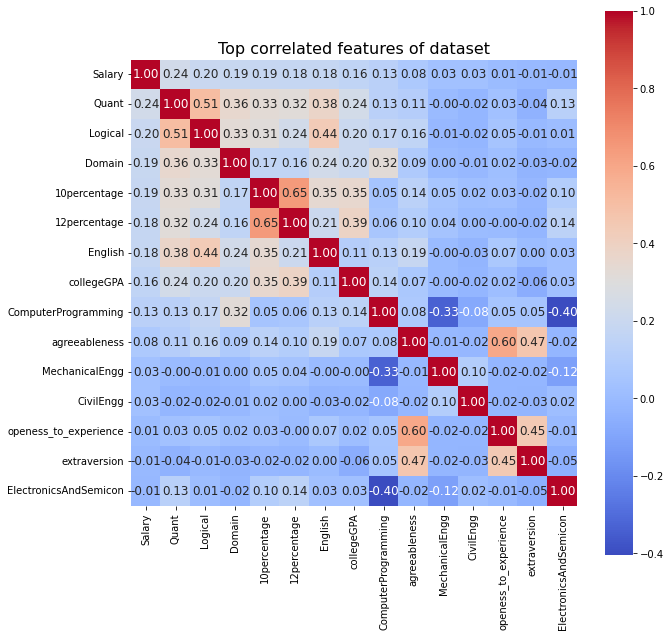

In [8]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'Salary')['Salary'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()

## Plot Gender based Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


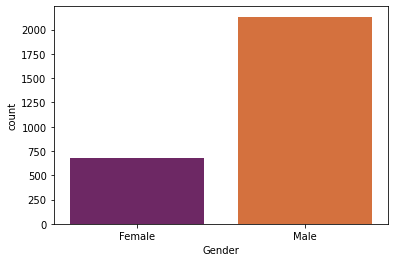

In [ ]:
sns.countplot(df.Gender,palette = 'inferno')

## How does College GPA affect the Salary ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


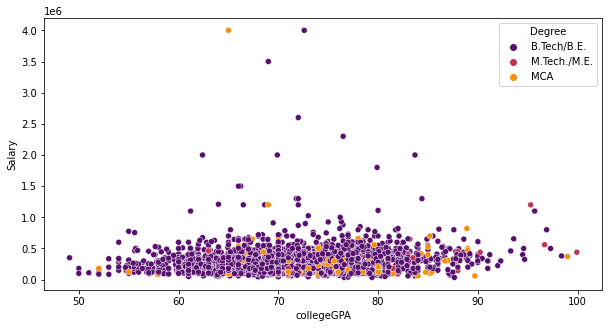

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(df.collegeGPA,df.Salary, hue = df.Degree,palette = 'inferno')

We can infer that College GPA doesn't have any significant effects in the Salary.

## Does Personality Traits have an impact on the Salary?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


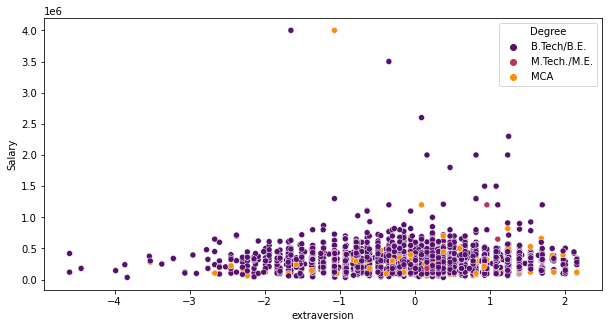

In [12]:
plt.figure(figsize = (10,5))
sns.scatterplot(df.extraversion,df.Salary, hue = df.Degree,palette = 'inferno')

Personality Traits do have an influence on getting a High-Salaried job.

## Does Experience in Relevant Field influence Salary?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


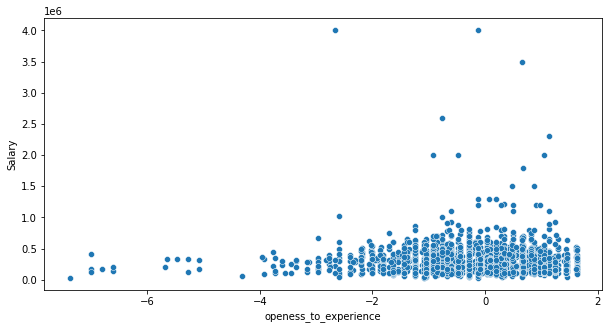

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(df.openess_to_experience,df.Salary)

### **Inference** : Exposure to relevant experience do promote the chance of getting high Salaried Job.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


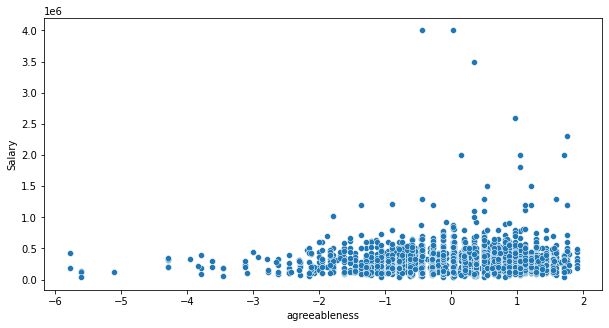

In [5]:
plt.figure(figsize = (10,5))
sns.scatterplot(df.agreeableness,df.Salary)

Inference : Agreeableness is also an important factor for getting high Salaried Job.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2810 non-null   object 
 1   10percentage           2810 non-null   float64
 2   12percentage           2810 non-null   float64
 3   Degree                 2810 non-null   object 
 4   Specialization         2810 non-null   object 
 5   collegeGPA             2810 non-null   float64
 6   English                2810 non-null   int64  
 7   Logical                2810 non-null   int64  
 8   Quant                  2810 non-null   int64  
 9   Domain                 2810 non-null   float64
 10  ComputerProgramming    2810 non-null   int64  
 11  ElectronicsAndSemicon  2810 non-null   int64  
 12  ComputerScience        2810 non-null   int64  
 13  MechanicalEngg         2810 non-null   int64  
 14  ElectricalEngg         2810 non-null   int64  
 15  Tele

Here we can see Gender, Degree and Specialization are of type Object. We need to encode before training the model.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Degree = le.fit_transform(df.Degree)
df.Specialization = le.fit_transform(df.Specialization)

In [ ]:
df.head()

,Gender,10percentage,12percentage,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,87.80,84.00,0,10,73.82,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,64.50,0,5,65.00,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,85.17,0,7,61.94,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,86.00,0,5,80.40,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,82.00,75.00,0,1,64.30,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


# Linear Regression to predict Salary

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Splitting Training Data and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Train the Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict the Salary in the Test Data

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[269581.34 345000.  ]
 [316759.81  60000.  ]
 [380415.59 300000.  ]
 ...
 [174852.34 110000.  ]
 [282364.04 500000.  ]
 [301589.83 350000.  ]]


**Inference :**
OpenRefine gives us flexibility in cleaning the datasets with the facets and the Clustering functionalities that they have. Removing Outliers from each column is easy compared to the Python Code that we need to write. 

Splitting the Dataset in a 80-20 ratio for training and testing allows us to train our Linear Regression model and predict the results of our Test Dataset.

From the further Analysis that I did, I'm able to infer that Gender, School GPA, College GPA etc. doesnt have any significant effects on the Individual's Salary. But exposure to Relevant Work Experience highly influence the Salary of an Individual.